In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline


In [20]:
for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:7*85984]
# 7개의 구간으로 나눔
for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df_all[85984*(i-1):85984*i].reset_index()

for i in range(7):
    data = {'Group' : [], 'batch_num' : [], 'mean_temp' : [], }

    for j in range(716):
        MEAN = np.mean(globals()['df_'+str(i+1)+'_temp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i+1)
        data['batch_num'].append(j+1)
        data['mean_temp'].append(MEAN)

    globals()['group_'+str(i+1)] = pd.DataFrame(data)

for i in range(1,7):
    mean = globals()['group_'+str(i)]['mean_temp'].mean()
    diff  = 261.7292228119181 - mean
    globals()['group_'+str(i)]['mean_temp'] += diff

for i in range(8,12):
    globals()['group_'+str(i)] = globals()['group_'+str(i-5)].copy()
    globals()['group_'+str(i)]['Group'] = i

def linear_function_new(data, sector, hour): 
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    N = 6
    dx = (600 - group_1['mean_temp'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
    dx_hour = dx / len(group_1) # 시간당 증가율
    
    return data + dx * (sector-1) + dx_hour * (hour-1) - 28


for sector in range(2,12):
    for j in range(716):
        data = globals()['group_'+str(sector)]['mean_temp'][j]
        globals()['group_'+str(sector)]['mean_temp'][j] = linear_function_new(data, sector, j) 


In [21]:
N = 6
dx = (600 - group_1['mean_temp'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_hour = dx / len(group_1) # 시간당 증가율
print(dx, dx_hour)

56.37846286468032 0.07874086992273788


## Group 데이터 평균 확인

In [22]:
for i in range(1,12):
    print('Mean Temperature : ', globals()['group_'+str(i)]['mean_temp'].mean())

Mean Temperature :  261.7292228119181
Mean Temperature :  318.17880580405443
Mean Temperature :  374.5572686687349
Mean Temperature :  430.9357315334151
Mean Temperature :  487.3141943980955
Mean Temperature :  543.6926572627757
Mean Temperature :  588.7668209770836
Mean Temperature :  656.4495829921365
Mean Temperature :  712.8280458568166
Mean Temperature :  769.206508721497
Mean Temperature :  825.5849715861773


In [ ]:
dx = (600 - 261.729) / 6
X = group_1['mean_temp'].mean()
print(X)
for i in range(1,12):
    X += dx 
    print(X)

In [99]:
(600 - 261.7292) / 6

56.37846666666667

In [98]:
group_3.mean()

Group          8.000000
batch_num    358.500000
mean_temp    261.729223
dtype: float64

In [80]:


TIME = pd.DataFrame({'TIME' : np.arange(5012)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = 'index', inplace = True)
df = tmp

In [88]:
group_5.mean()

Group         10.000000
batch_num    358.500000
mean_temp    994.949482
dtype: float64

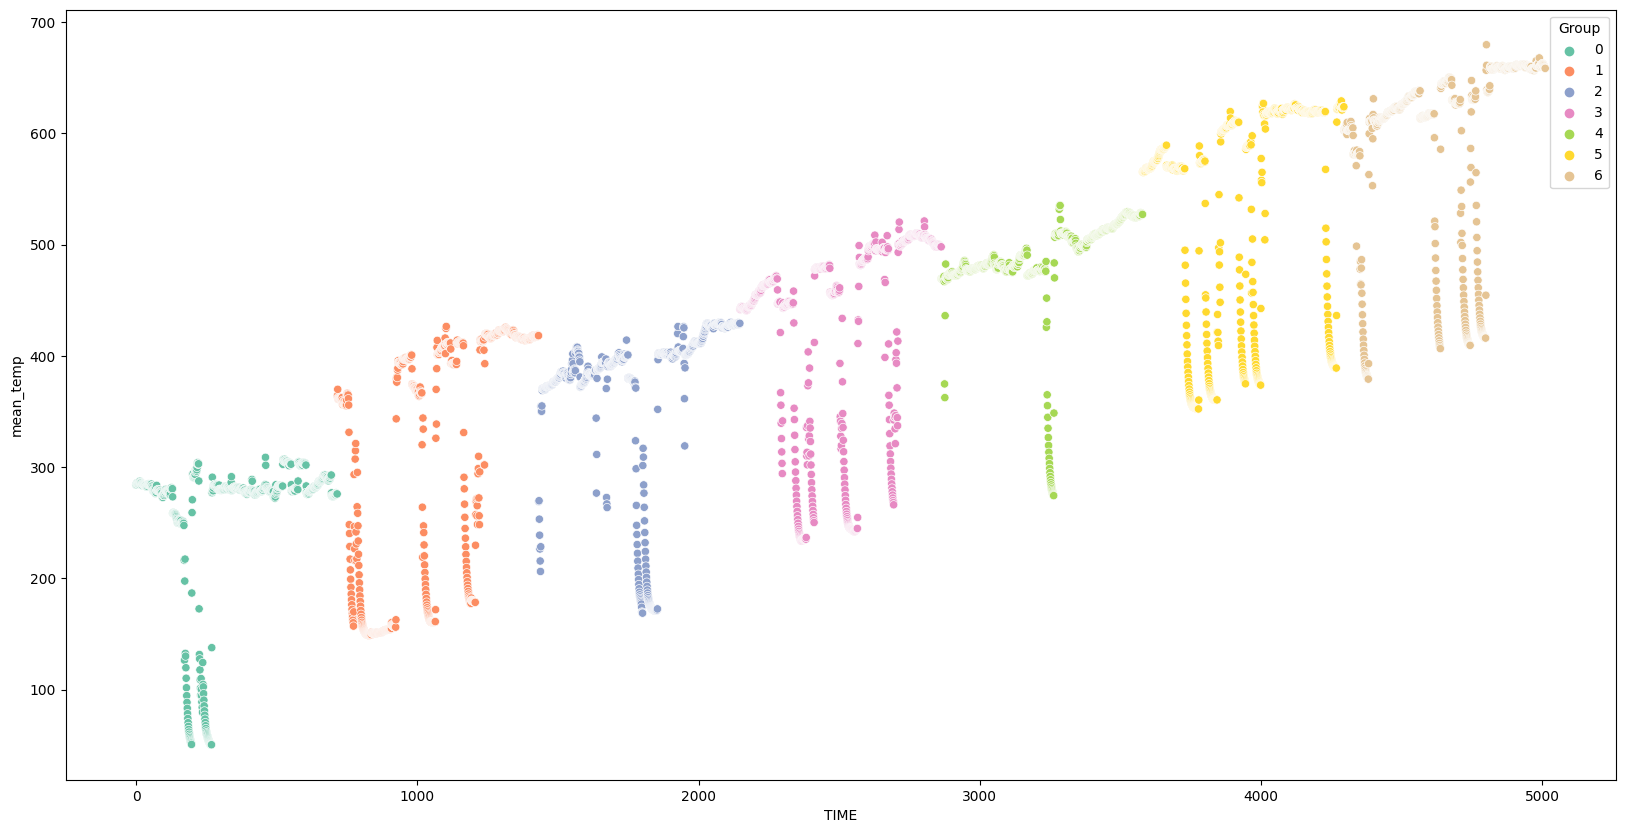

In [67]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'TIME', y = 'mean_temp', data = df, hue='Group', palette='Set2')
plt.show()

In [ ]:
N = 5
for sector in range(7,7):
    for j in range(716):
        data = globals()['group_'+str(sector+1)]['mean_temp'][j]
        globals()['group_'+str(sector+1)]['mean_temp'][j] = linear_function_new(data, N, sector, j)